In [1]:
import meals as ml
import tools as tl
import paths
from preprocessing import read_csv_clean

# ctrl_files = paths.reversal_ivsa_ctrl
# exp_files = paths.reversal_ivsa_exp

In [2]:
ctrl_meal_count = []
for path in paths.reversal_ivsa_ctrl:
    try:
        test = read_csv_clean(path)
        avg = round(len(ml.find_meals(test)) / ml.experiment_duration(test), 2)
        ctrl_meal_count.append(avg)
    except:
        pass
exp_meal_count = []
for path in paths.reversal_ivsa_exp:
    test = read_csv_clean(path)
    avg = round(len(ml.find_meals(test)) / ml.experiment_duration(test), 2)
    exp_meal_count.append(avg)

print(ctrl_meal_count, exp_meal_count)

[23.83, 32.31, 37.4, 24.0, 22.67] [23.37, 31.27, 34.74, 36.4, 35.78]


/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/50/Reversal/FED000_032124_03.CSV


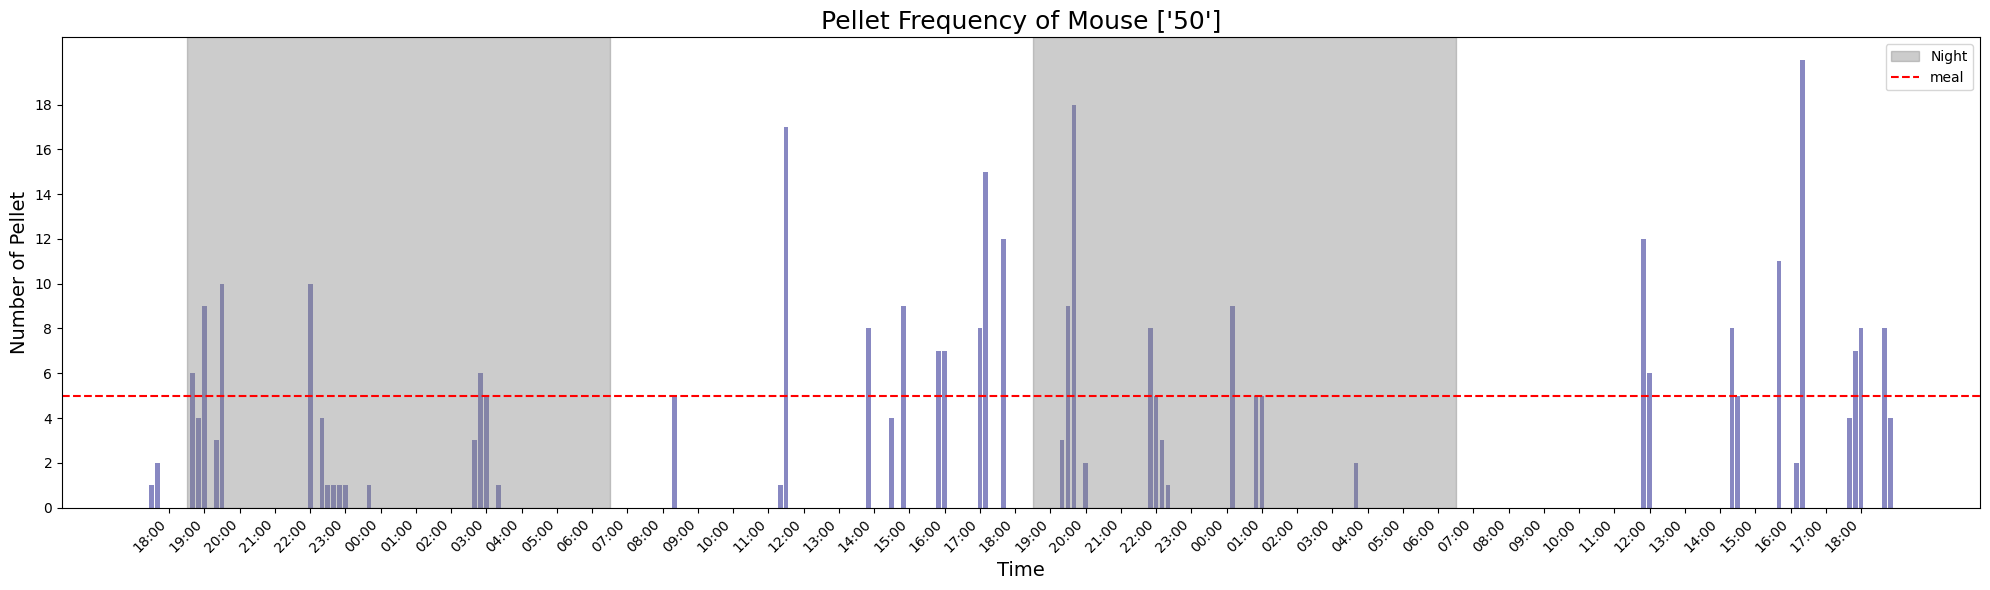

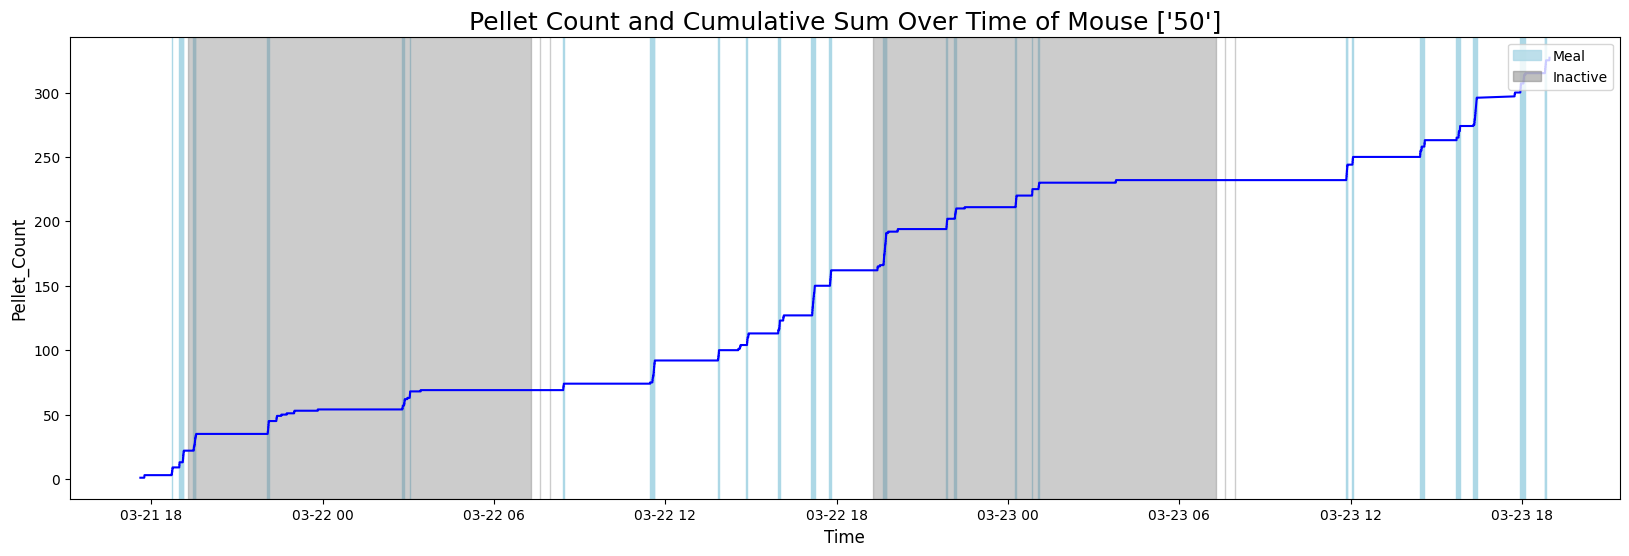

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/51/Reversal/FED000_032124_04.CSV


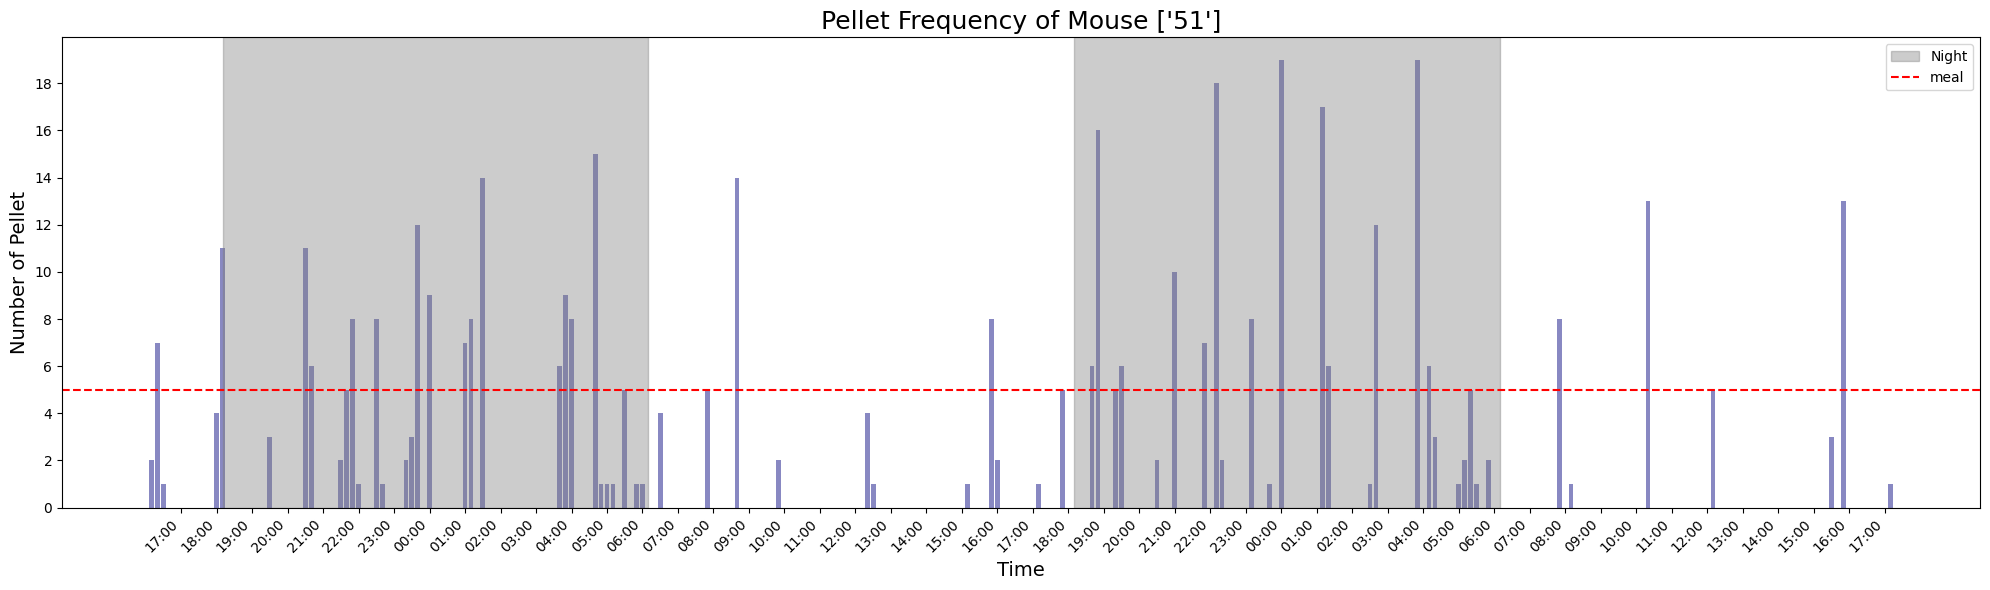

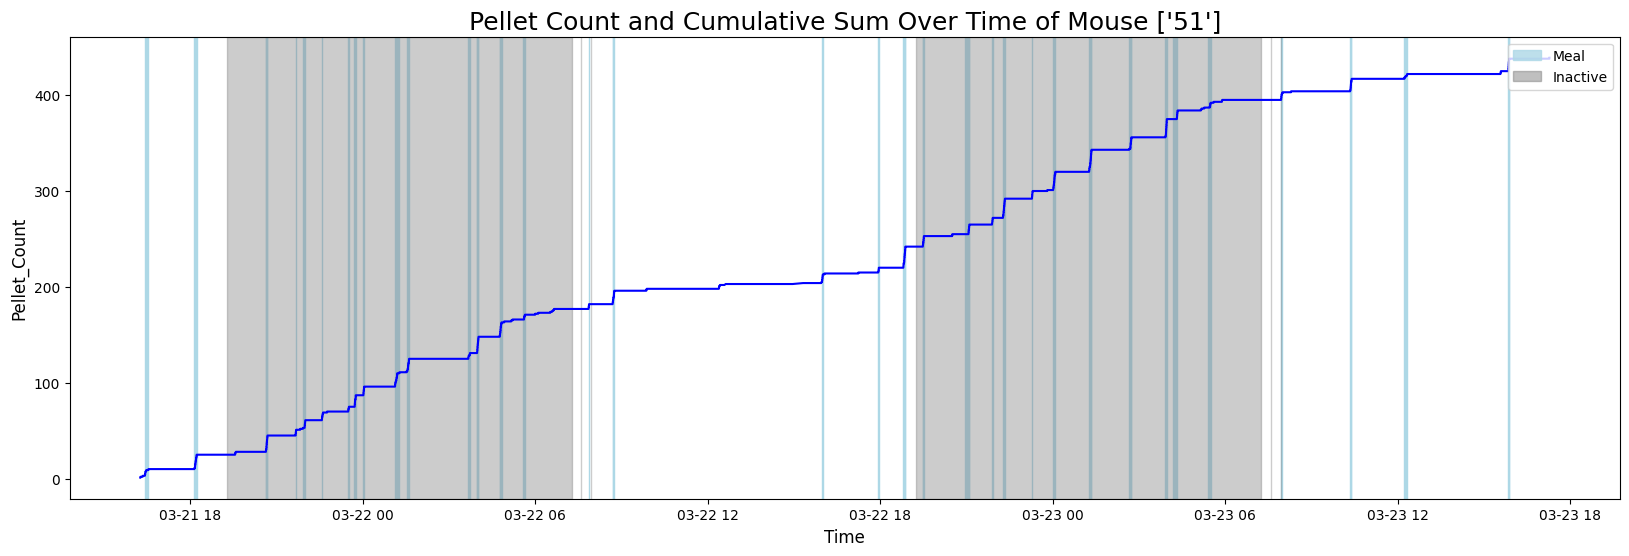

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/44/Reversal/FED000_032124_03.CSV


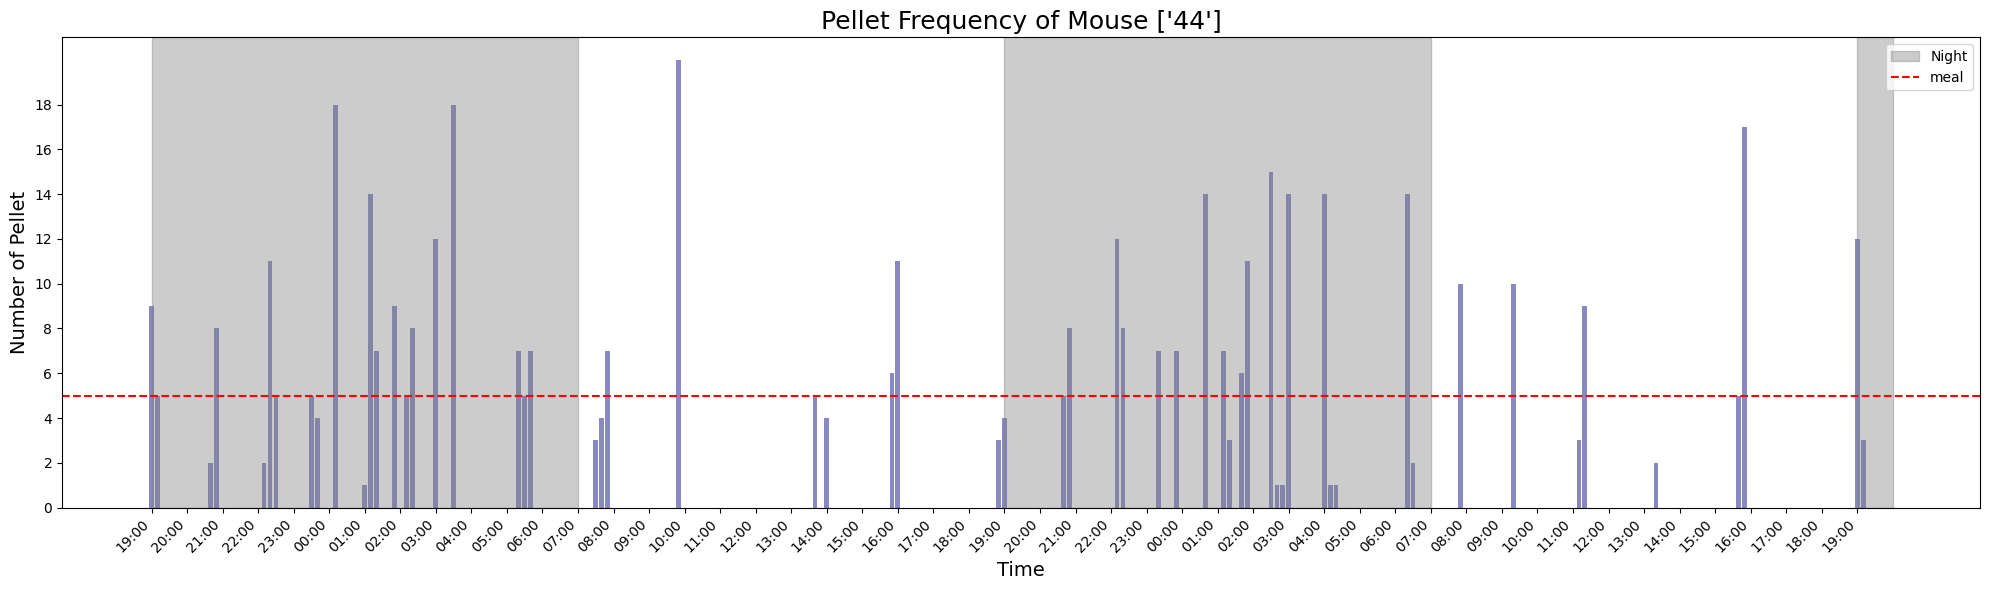

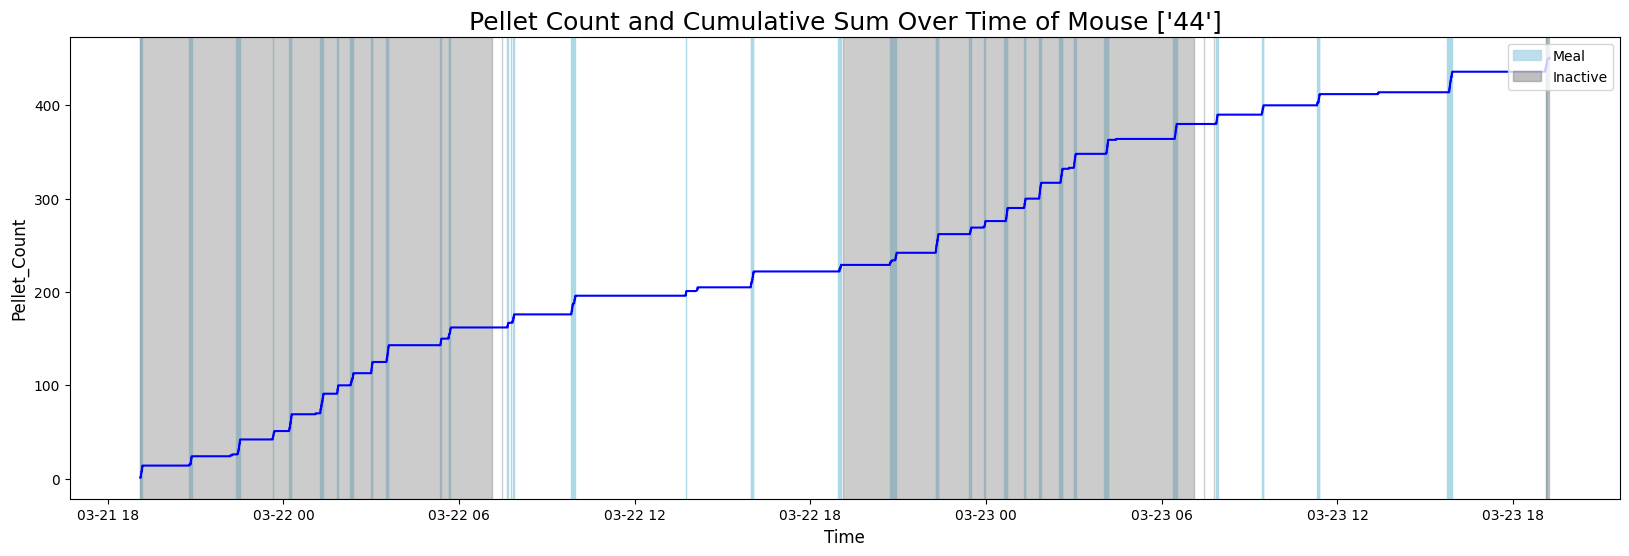

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/53/Reversal/FED000_032124_02.CSV


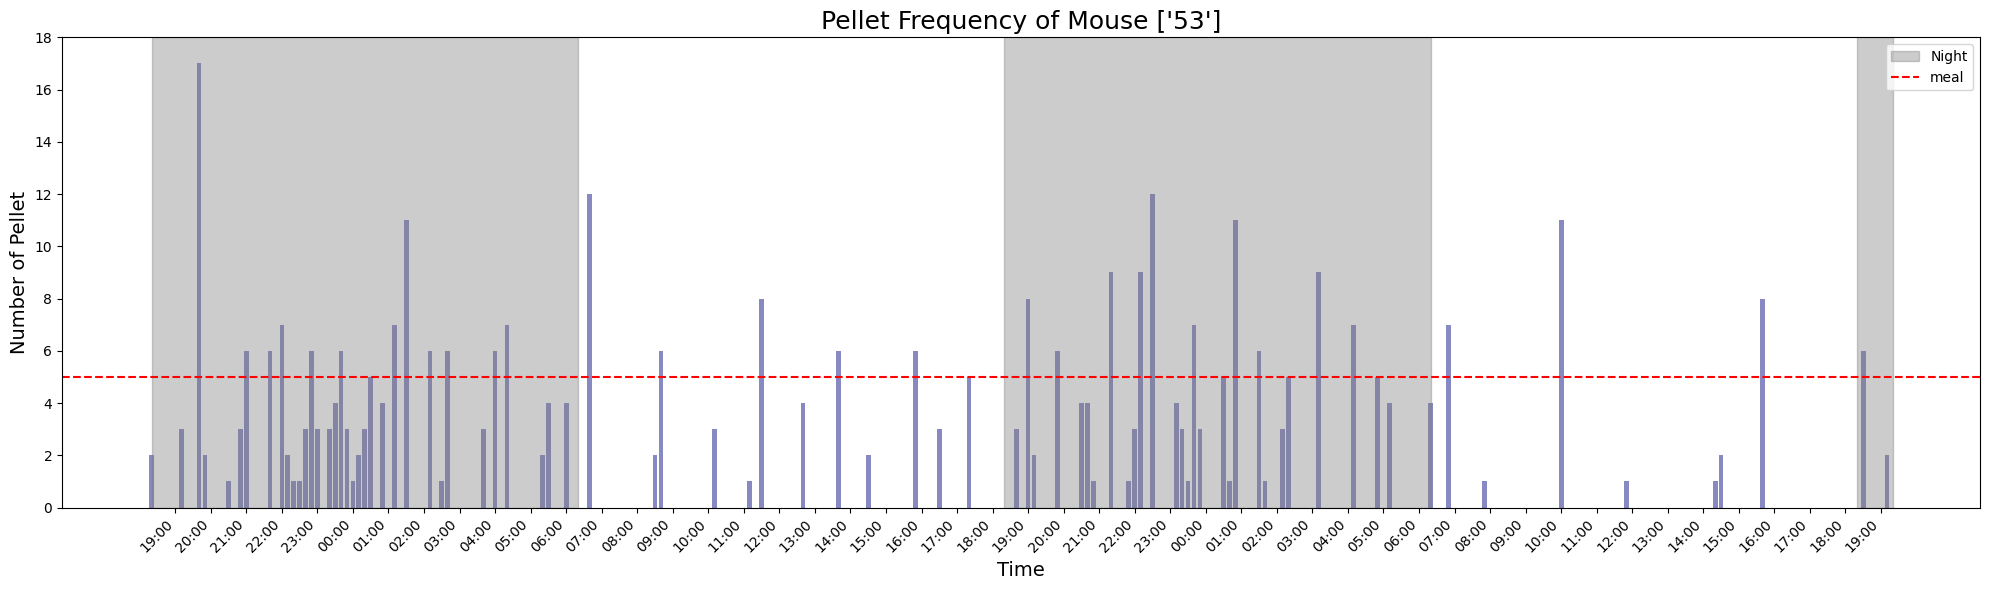

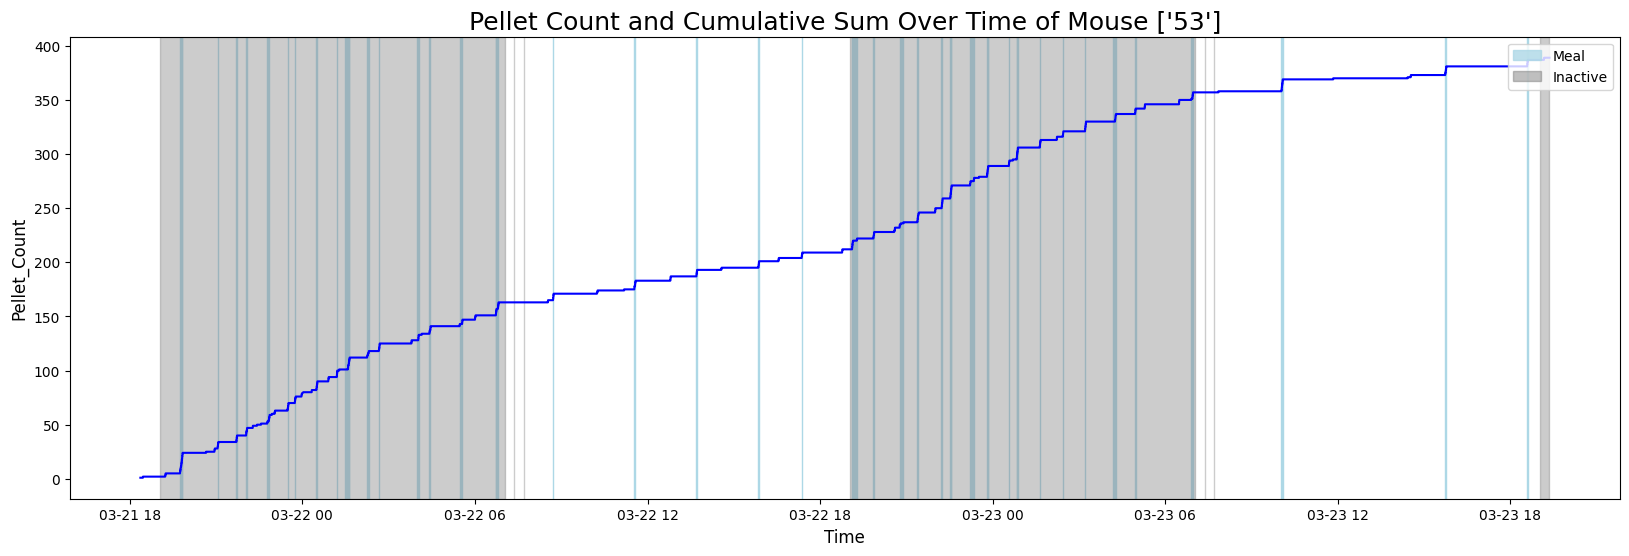

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/41/Reversal/FED000_032124_01.CSV


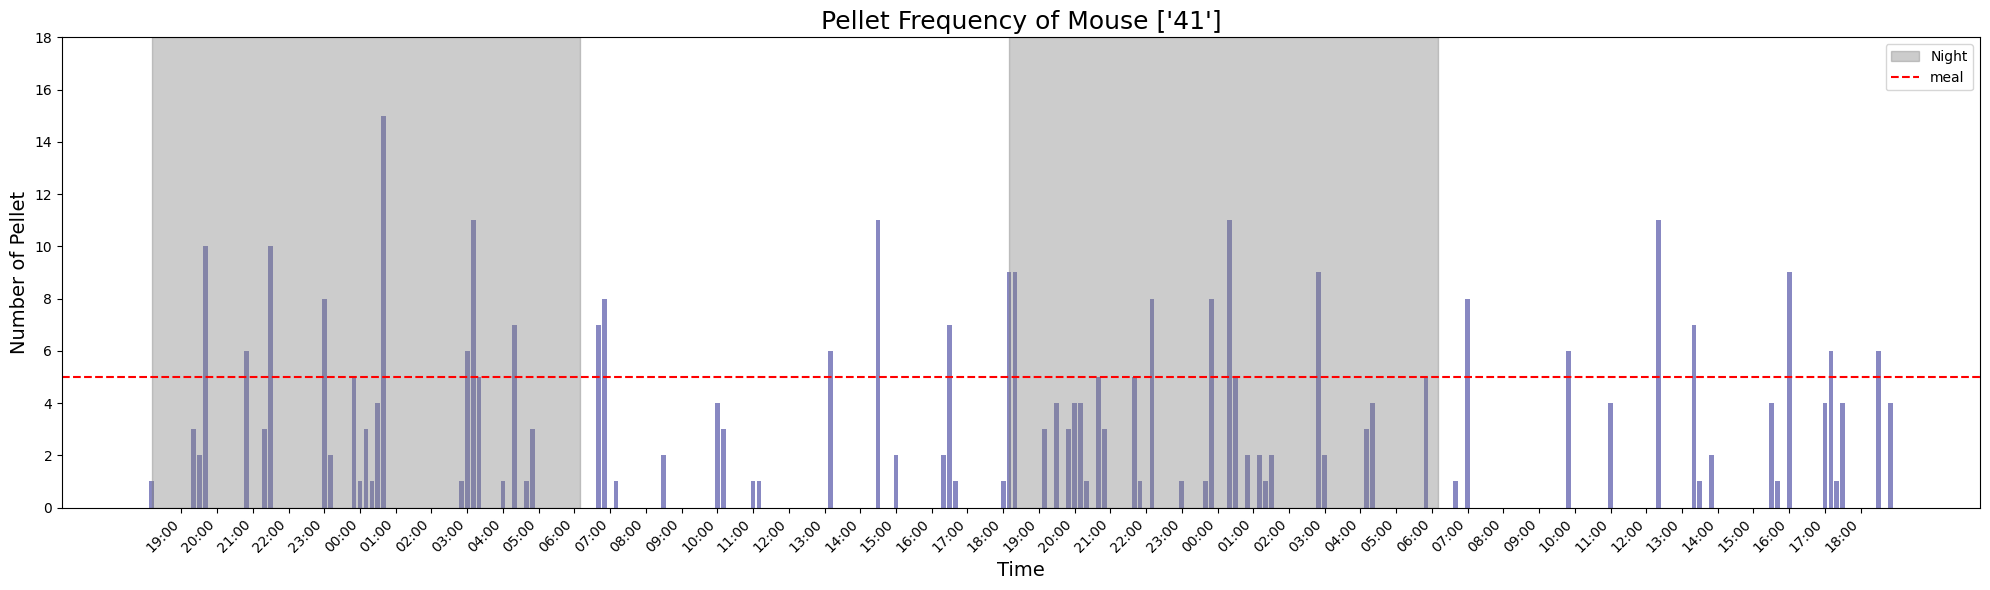

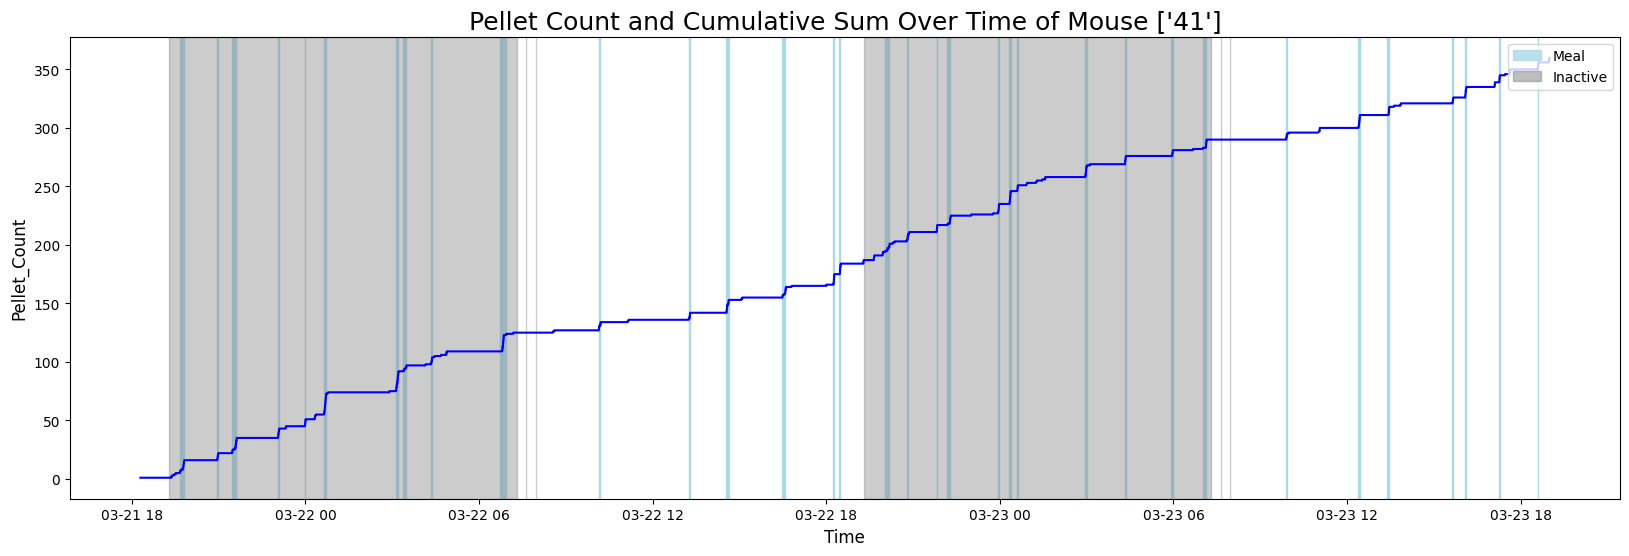

In [3]:
ctrl_avg_pellet = [] # pellet per hour
ctrl_dark_meals = [] # percentage of meals in inactive/dark phase
for path in paths.reversal_ivsa_ctrl:
    try:
        print(path)
        data = read_csv_clean(path)
        meal = ml.find_meals(data)
        group = ml.pellet_flip(data)
        num = tl.get_bhv_num(path)
        ctrl_avg_pellet.append(ml.average_pellet(group))
        ctrl_dark_meals.append(ml.active_meal(meal))
        ml.graph_pellet_frequency(group, None, num)
        ml.graphing_cum_count(data, meal, None, num, flip=True)
    except:
        pass

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/57/Reversal/FED000_032124_03.CSV


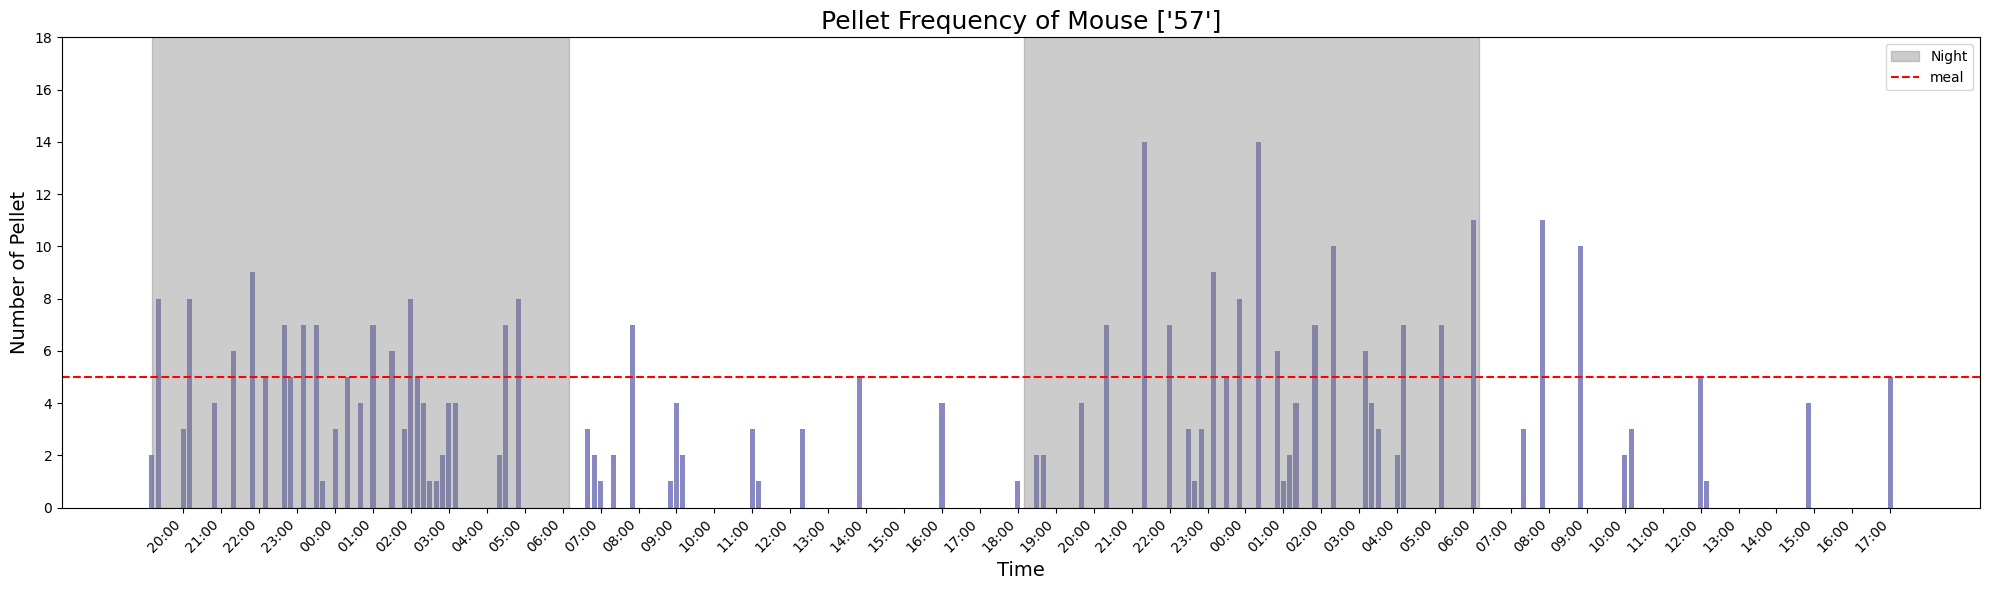

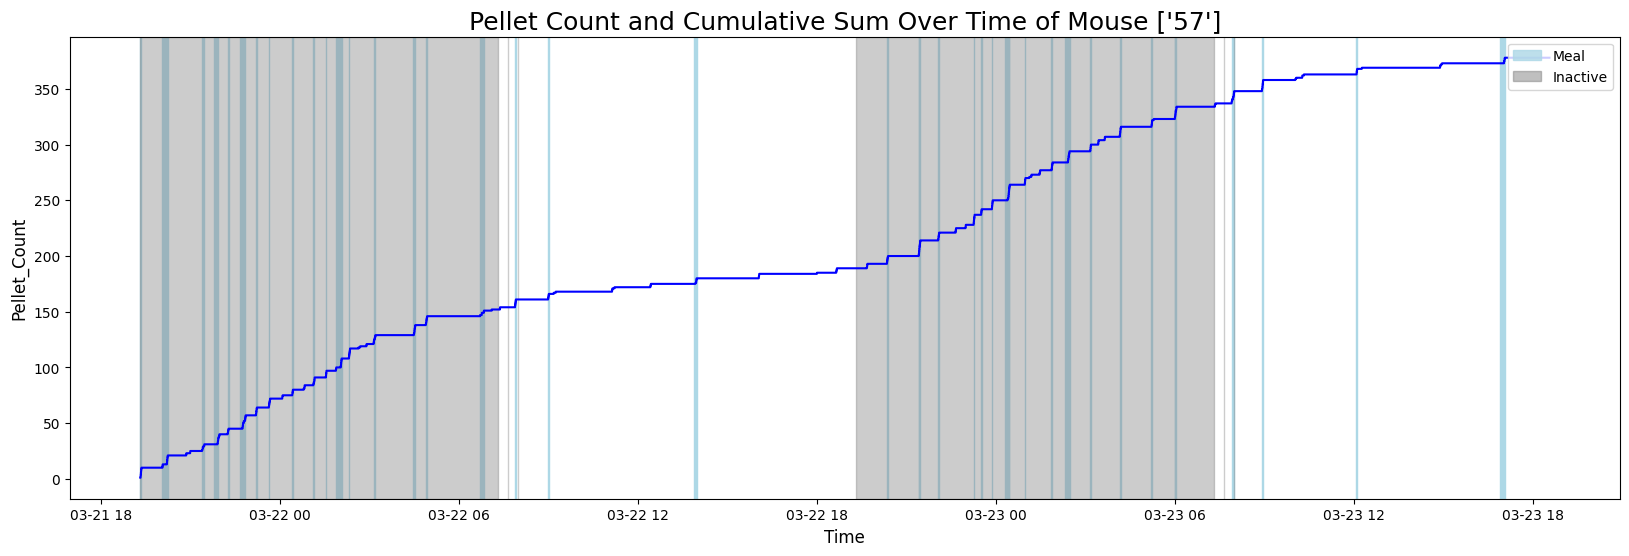

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/56/Reversal/FED000_032124_02.CSV


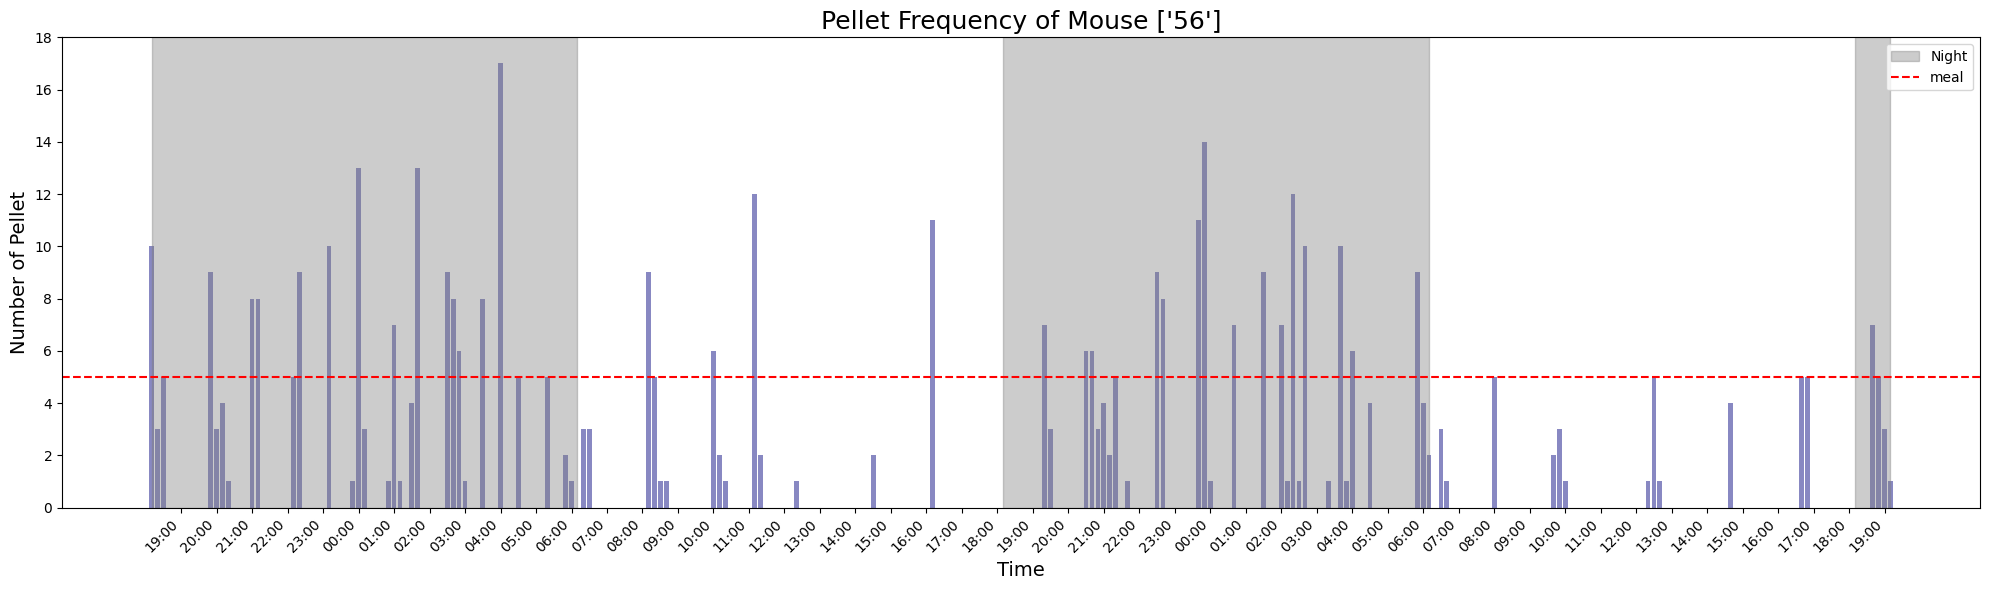

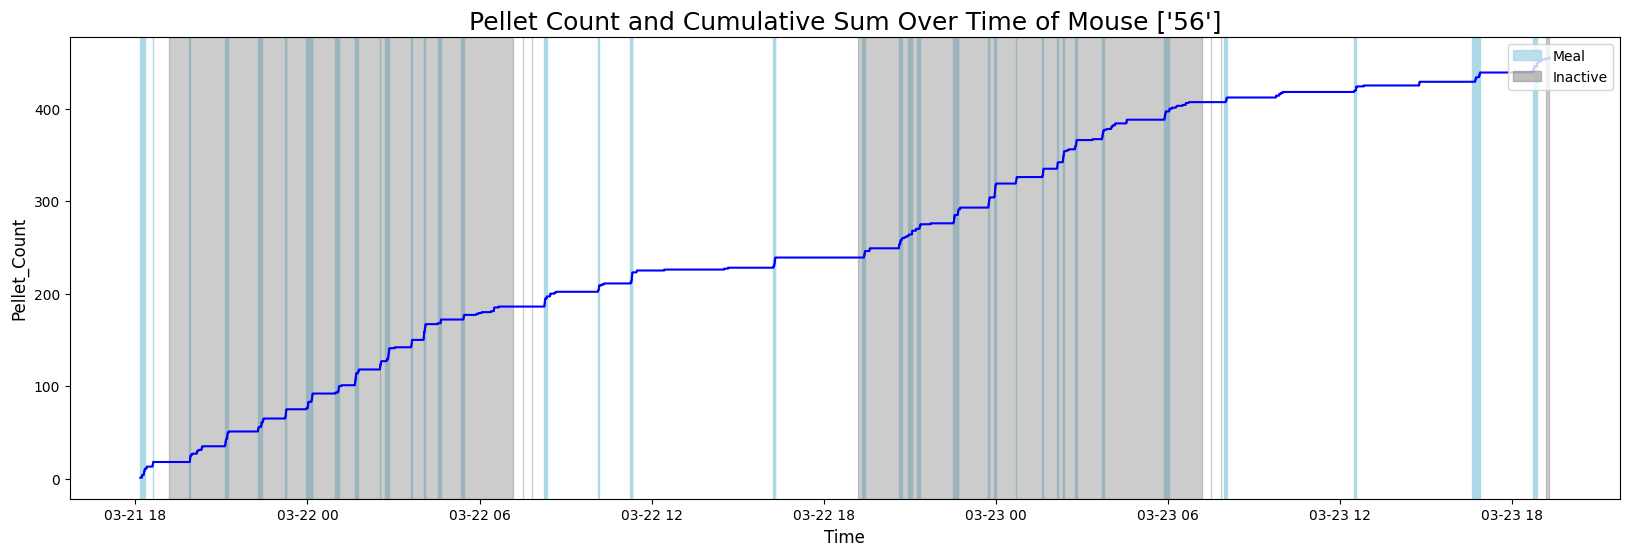

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/54/Reversal/FED000_032124_07.CSV


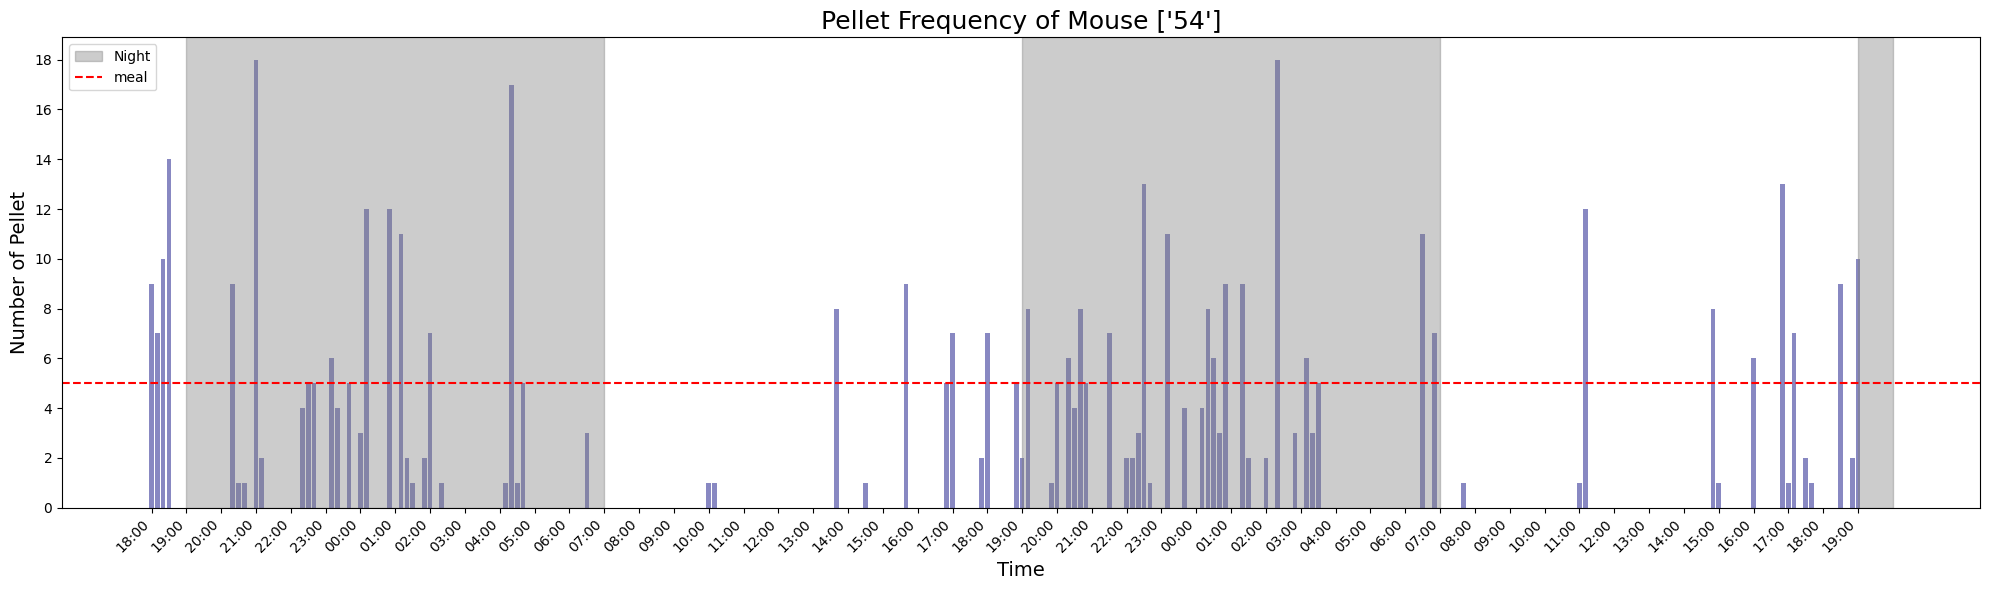

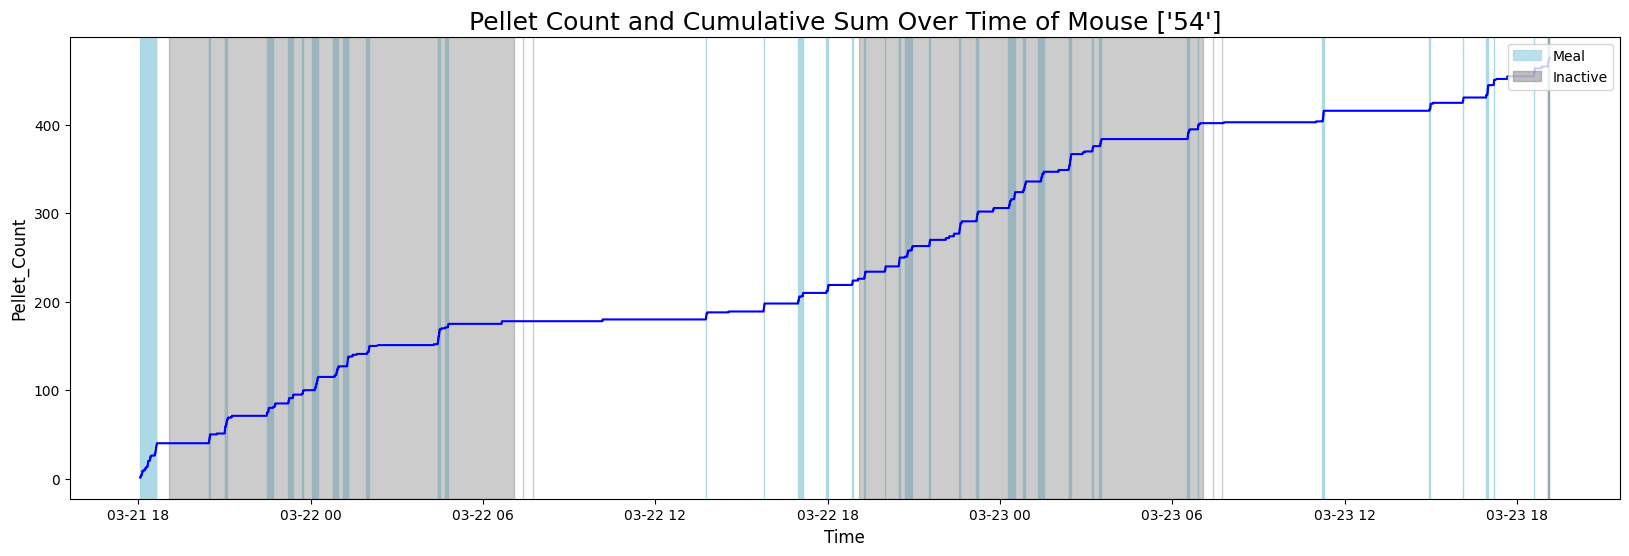

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/55/Reversal/FED000_032124_04.CSV


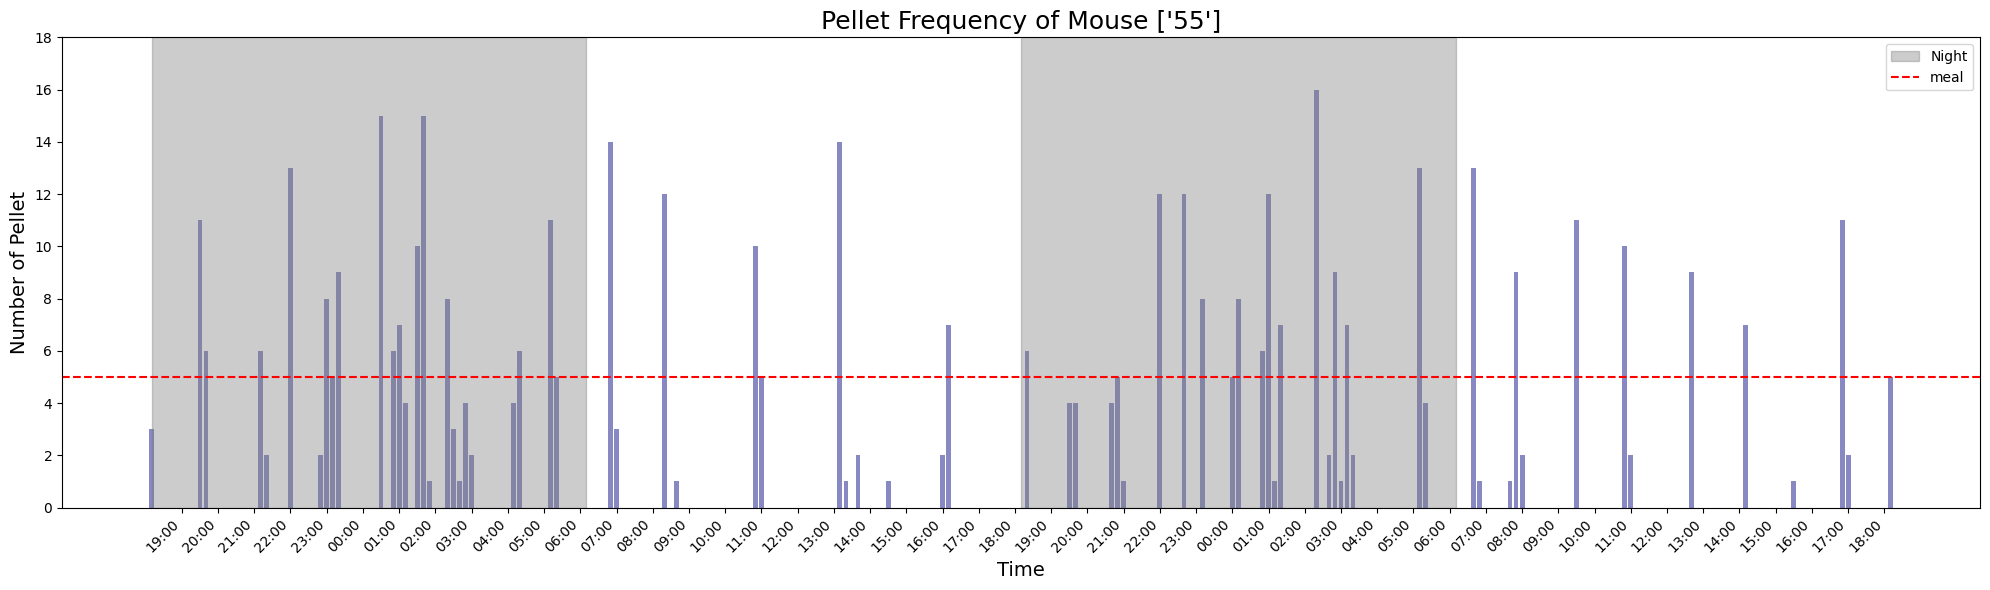

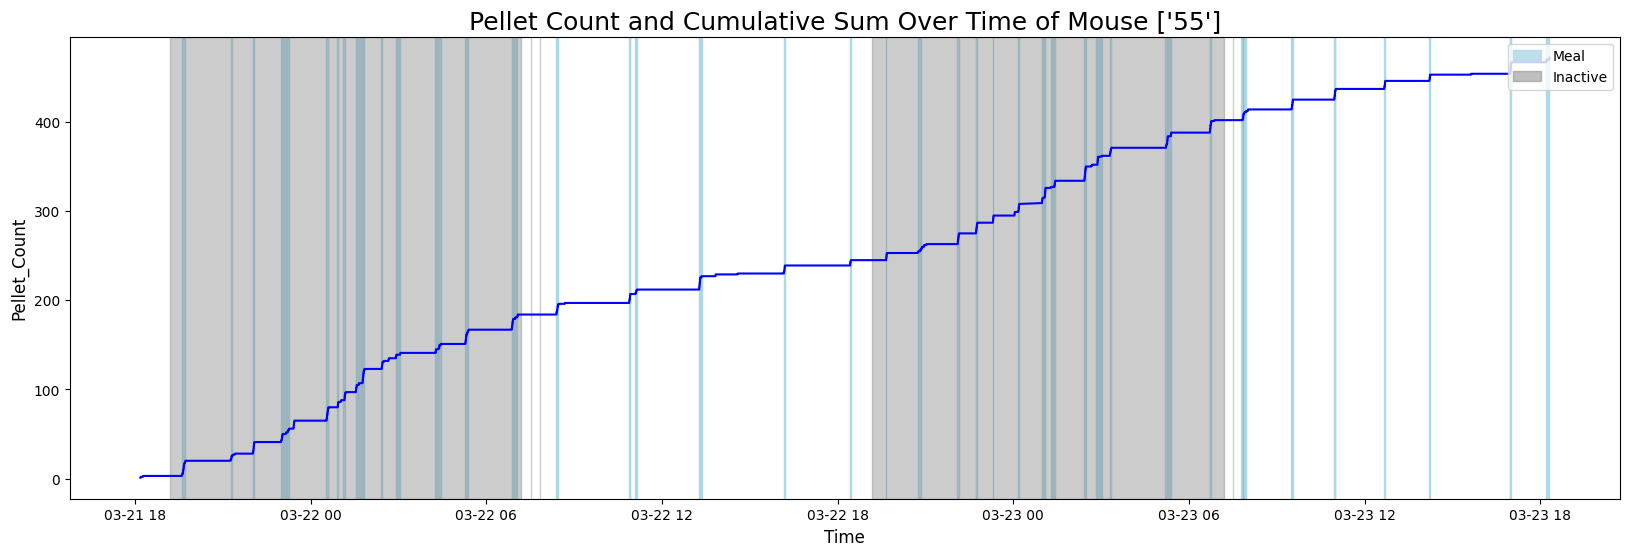

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/47/Reversal/FED000_032124_02.CSV


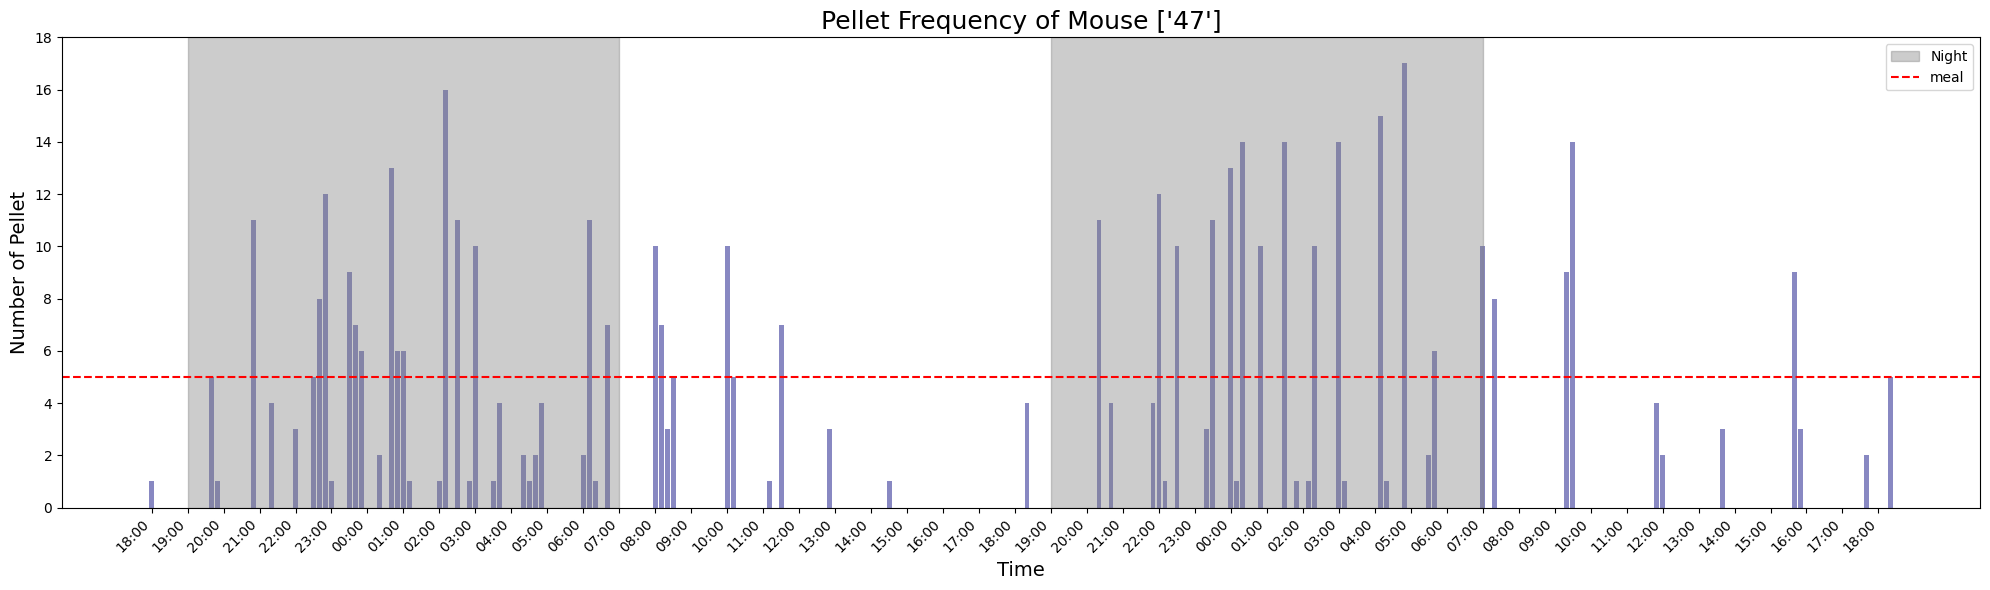

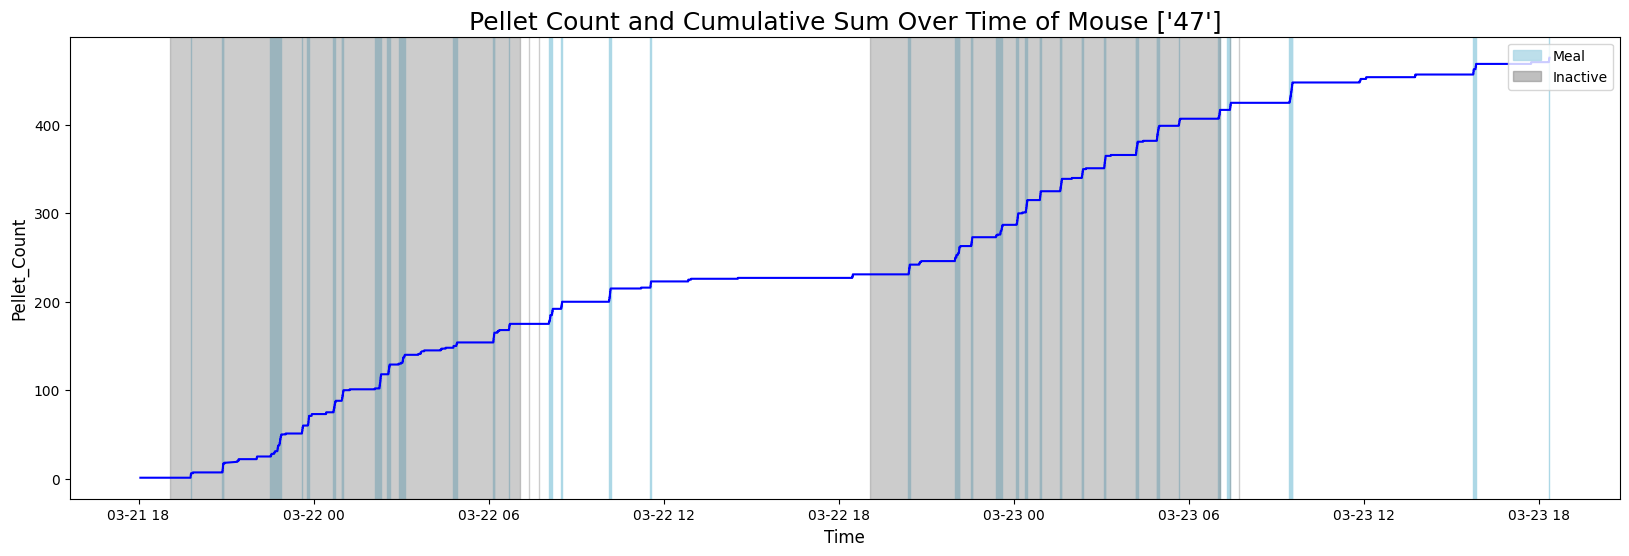

In [4]:
exp_avg_pellet = [] # pellet per hour
exp_dark_meals = [] # percentage of meals in inactive/dark phase
for path in paths.reversal_ivsa_exp:
    print(path)
    data = read_csv_clean(path)
    meal = ml.find_meals(data)
    group = ml.pellet_flip(data)
    num = tl.get_bhv_num(path)
    exp_avg_pellet.append(ml.average_pellet(group))
    exp_dark_meals.append(ml.active_meal(meal))
    ml.graph_pellet_frequency(group, None, num)
    ml.graphing_cum_count(data, meal, None, num, flip=True)

In [5]:
ctrl_avg_pellet, exp_avg_pellet

([6.628, 8.959, 9.363, 7.966, 7.397], [8.247, 9.286, 9.714, 9.833, 9.848])

In [6]:
ctrl_dark_meals, exp_dark_meals

([0.3469, 0.7121, 0.72, 0.8163, 0.6522], [0.8261, 0.75, 0.7042, 0.7123, 0.75])

In [11]:
import intervals as invs

invs.perform_T_test(ctrl_avg_pellet, exp_avg_pellet, test_side='greater')

P Value is  0.026718450874088983
Experiment group is significantly greater than control group


In [12]:
invs.perform_T_test(ctrl_dark_meals, exp_dark_meals, test_side='greater')

P Value is  0.13336501292780317
There is no significant difference between the two groups.


Control Size: 5
PICA Size: 5
Control Average: 8.0626
PICA Average: 9.3856
Control Standard Deviation: 1.1185934471469066
PICA Standard Deviation: 0.6760468179053877


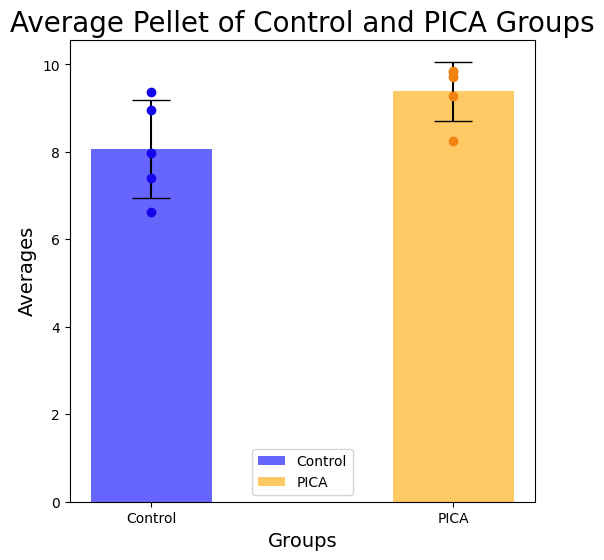

In [13]:
ml.graph_average_pellet(ctrl_avg_pellet, exp_avg_pellet, exp_name='PICA')